## Tier 1. Module 3: Basic Algorithms and Data Structures

## Topic 10 - Linear programming and randomized algorithms

## Homework

### Task 1

The company produces two types of drinks: "Lemonade" and "Fruit juice". Different ingredients and a limited amount of equipment are used to produce these drinks. The challenge is to maximize production given limited resources.

Task conditions:

1. "Lemonade" is made from "Water", "Sugar" and "Lemon juice".
2. "Fruit juice" is made from "Fruit puree" and "Water".
3. Limitation of resources: 100 units. "Waters", 50 units. "Sugar", 30 units. "Lemon juice" and 40 units. "Fruit puree".
4. The production of a unit of "Lemonade" requires 2 units. "Waters", 1 unit "Sugar" and 1 unit "Lemon juice".
5. The production of a unit of "Fruit juice" requires 2 units. "Fruit puree" and 1 unit "Waters".

Using PuLP, create a model that determines how much "Lemonade" and "Fruit Juice" should be produced to maximize the total number of products, subject to resource constraints. Write a program whose code maximizes the total number of products "Lemonade" and "Fruit Juice" produced, given the constraints on the number of resources.

In [8]:
import pulp

# Creating a model
production_model = pulp.LpProblem("Maximize Production", pulp.LpMaximize)

# Definition of variables (quantity of lemonade and fruit juice produced)
lemonade = pulp.LpVariable("Lemonade", lowBound=0, cat="Integer")
fruit_juice = pulp.LpVariable("Fruit Juice", lowBound=0, cat="Integer")

# Objective function to be maximized
production_model += lemonade + fruit_juice, "Max Total Number"

# Resource limitations
production_model += 2 * lemonade + 1 * fruit_juice <= 100  # Water
production_model += 1 * lemonade + 0 * fruit_juice <= 50  # Sugar
production_model += 1 * lemonade + 0 * fruit_juice <= 30  # Lemon juice
production_model += 0 * lemonade + 2 * fruit_juice <= 40  # Fruit puree

# Model solution
production_model.solve()

# Output of results
print(
    f"Total number of the products produced: {pulp.value(lemonade) + pulp.value(fruit_juice)}"
)
print("Lemonade:", pulp.value(lemonade))
print("Fruit Juice:", pulp.value(fruit_juice))

Total number of the products produced: 50.0
Lemonade: 30.0
Fruit Juice: 20.0


#### Conclusion:

The maximum production volume is 50 items (30 units of lemonade and 20 units of fruit juice). At the same time, the ingredients that limit production are lemon juice and fruit puree, while water and sugar are available in excess.

### Task 2

The task is to calculate the value of the integral of the function using the Monte Carlo method. The function can be chosen at your own discretion.

1. Calculate the value of the integral of the function using the Monte Carlo method, in other words, find the area under this graph (gray area).
2. Check the correctness of the calculations to confirm the accuracy of the Monte Carlo method, by comparing the obtained result with analytical calculations or the result of executing the `quad` function. Draw conclusions.

#### 2.1 - Construction of the graph

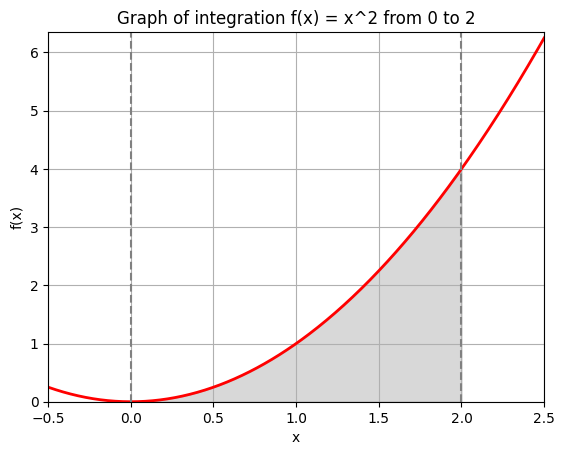

In [3]:
import matplotlib.pyplot as plt
import numpy as np


# Definition of function and limit of integration
def f(x: float) -> float:
    return x**2


a = 0  # Lower limit
b = 2  # Upper limit

# Creating a range of values for x
x = np.linspace(-0.5, 2.5, 400)
y = f(x)

# Creating the graph
fig, ax = plt.subplots()

# Drawing the function
ax.plot(x, y, "r", linewidth=2)

# Filling the area under the curve
ix = np.linspace(a, b)
iy = f(ix)
ax.fill_between(ix, iy, color="gray", alpha=0.3)

# Schedule settings
ax.set_xlim([x[0], x[-1]])
ax.set_ylim([0, max(y) + 0.1])
ax.set_xlabel("x")
ax.set_ylabel("f(x)")

# Adding integration limits and chart titles
ax.axvline(x=a, color="gray", linestyle="--")
ax.axvline(x=b, color="gray", linestyle="--")
ax.set_title(f"Graph of integration f(x) = x^2 from {str(a)} to {str(b)}")
plt.grid()
plt.show()

#### 2.2 - Integral of a function using the Monte Carlo method

In [16]:
def monte_carlo_integration(
    func, a: float, b: float, num_samples: int = 10000
) -> float:
    # Generating random points in the rectangle [a, b] x [0, max(f(x))]
    x_samples = np.random.uniform(a, b, num_samples)
    y_samples = np.random.uniform(0, max(func(x_samples)), num_samples)

    # Calculation of the number of points that fall under the curve
    count_under_curve = sum(y_samples <= func(x_samples))

    # Determining the area of a rectangle and the area under a curve
    total_area = (b - a) * max(func(x_samples))
    area_under_curve = total_area * count_under_curve / num_samples

    return area_under_curve


# Output of results
monte_carlo_result = monte_carlo_integration(f, a, b)
print(f"The value of the integral by the Monte Carlo method: {monte_carlo_result}")

The value of the integral by the Monte Carlo method: 2.67141059306095


#### 2.3 - Checking the correctness of calculations

In [23]:
import scipy.integrate as spi

# Calculating the integral using the quad function
quad_result, error = spi.quad(f, a, b)
print(f"The value of the integral using the quad functiond: {quad_result}")

# Relative error
err = (quad_result - monte_carlo_result) / quad_result * 100
print(f"Relative error: {abs(err):.2f} %")

The value of the integral using the quad functiond: 2.666666666666667
Relative error: 0.18 %


#### Conclusion:

Analytical value of the definite integral:

$$ \int_0^2 f(x^2) \;dx = \frac{x^3}{3} \Big|_0^2 = \frac{2^3}{3} - 0 = 2.66(6) $$

The built-in `quad' function found the correct value to within 15 decimal places, while the Monte Carlo method was only 0.18% wrong after generating 10,000 random samples.